In [ ]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [12]:
# read the dataframe
df = pd.read_csv(r'C:\Users\ishan\OneDrive\Desktop\movies.csv') 

In [15]:
# lets explore the data 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [17]:
# looking for missing values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  -{:.2}% ' .format(col,pct_missing))

name  -0.0% 
rating  -0.01% 
genre  -0.0% 
year  -0.0% 
released  -0.00026% 
score  -0.00039% 
votes  -0.00039% 
director  -0.0% 
writer  -0.00039% 
star  -0.00013% 
country  -0.00039% 
budget  -0.28% 
gross  -0.025% 
company  -0.0022% 
runtime  -0.00052% 


In [19]:
# data types of the columns in the dataframe
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [21]:
# changing data type of coulmns
df['budget'] = df['budget'].fillna(0).astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0


In [23]:
df['Gross'] = df['gross'].fillna(0).astype('int64')

In [25]:
df['year_released'] = df['released'].str.extract(r'(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,46998772,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,58853106,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,538375067,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,83453539,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,39846344,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,0,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,0,2020


In [27]:
df['released_date']= df['released'].str.extract(r'([A-Za-z]+\s\d{1,2})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,46998772,1980,June 13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,58853106,1980,July 2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,538375067,1980,June 20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,83453539,1980,July 2
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,39846344,1980,July 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,0,2020,October 23
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,0,2020,February 7
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,0,2020,April 27
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,0,2020,October 1


In [29]:
df=df.drop('released', axis=1)
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,46998772,1980,June 13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,58853106,1980,July 2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,538375067,1980,June 20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,83453539,1980,July 2
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,39846344,1980,July 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,NaN,NaN,90.0,0,2020,October 23
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,NaN,Cactus Blue Entertainment,90.0,0,2020,February 7
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,NaN,Embi Productions,NaN,0,2020,April 27
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,NaN,NaN,120.0,0,2020,October 1


In [31]:
df = df[df['genre'] == 'Horror'].sort_values('score',ascending = False)
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
207,The Thing,R,Horror,1982,8.1,382000.0,John Carpenter,Bill Lancaster,Kurt Russell,United States,15000000,19632053.0,Universal Pictures,109.0,19632053,1982,June 25
7056,Get Out,R,Horror,2017,7.7,517000.0,Jordan Peele,Jordan Peele,Daniel Kaluuya,United States,4500000,255589157.0,Universal Pictures,104.0,255589157,2017,February 24
3873,The Others,PG-13,Horror,2001,7.6,346000.0,Alejandro Amenábar,Alejandro Amenábar,Nicole Kidman,Spain,17000000,209947037.0,Cruise/Wagner Productions,104.0,209947037,2001,August 10
4456,Saw,R,Horror,2004,7.6,391000.0,James Wan,Leigh Whannell,Cary Elwes,United States,1200000,103911669.0,Evolution Entertainment,103.0,103911669,2004,October 29
483,A Nightmare on Elm Street,R,Horror,1984,7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000,25507137.0,New Line Cinema,91.0,25507137,1984,November 16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,Carnosaur,R,Horror,1993,3.6,3700.0,Adam Simon,John Brosnan,Diane Ladd,United States,850000,1753979.0,New Horizons Picture,83.0,1753979,1993,May 21
266,Time Walker,PG,Horror,1982,3.6,1700.0,Tom Kennedy,Jason Williams,Ben Murphy,United States,750000,NaN,Byzantine Productions,83.0,0,1982,November 19
7659,I Am Fear,Not Rated,Horror,2020,3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,0,13266.0,Roxwell Films,87.0,13266,2020,March 3
7345,Slender Man,PG-13,Horror,2018,3.2,30000.0,Sylvain White,David Birke,Joey King,United States,10000000,51738549.0,Screen Gems,93.0,51738549,2018,August 10


In [33]:
df=df.sort_values(by=['gross'],inplace=False , ascending=False) 

In [35]:
pd.set_option('display.max_rows',None)

In [37]:
# Drop the duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

4676                                    Warner Bros.
1186                              Vista Organization
1388                                Vestron Pictures
251                                  VAE Productions
6850                              Universal Pictures
682          United Film Distribution Company (UFDC)
4331                                  United Artists
6536               Ulrich Seidl Film Produktion GmbH
3932                                       USA Films
575                                        UAA Films
4694                                Twisted Pictures
7063                           Twentieth Century Fox
2769                                   Triumph Films
4880                                TriStar Pictures
1172                 Trans World Entertainment (TWE)
1290                     Trancas International Films
4110                                     Tonic Films
1184                               Titan Productions
47                      The Jerry Gross Organi

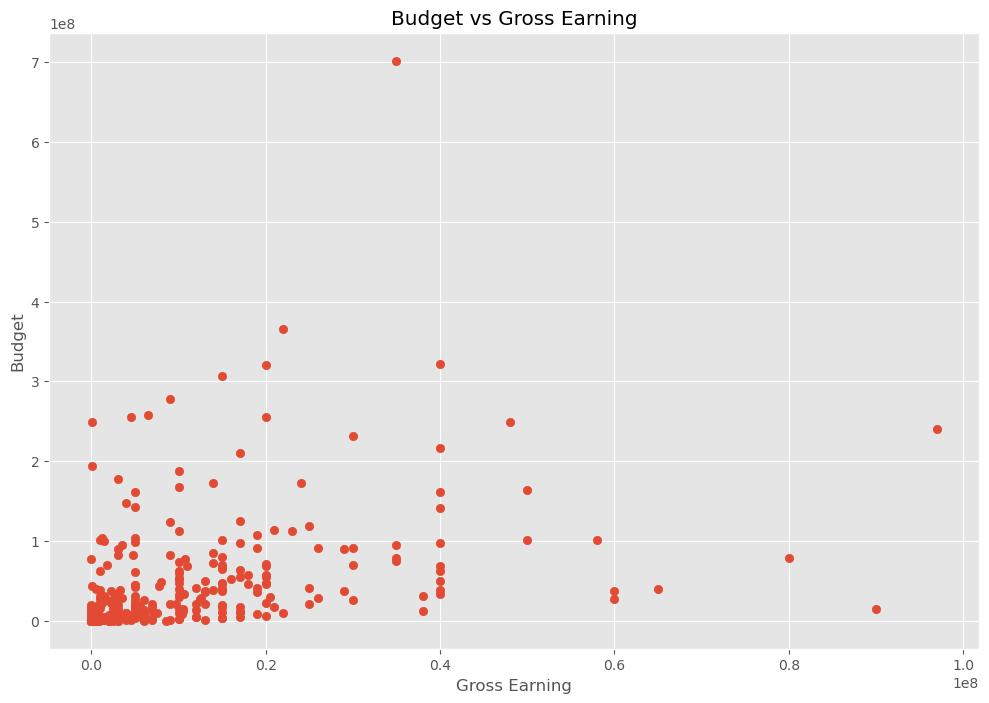

In [39]:
# Scatter plot with Budget vs Gross revenue

plt.scatter(x=df['budget'], y=df['Gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')

plt.show()

In [41]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
7046,It,R,Horror,2017,7.3,478000.0,Andy Muschietti,Chase Palmer,Bill Skarsgård,United States,35000000,701796444.0,New Line Cinema,135.0,701796444,2017,September 8
7285,The Nun,R,Horror,2018,5.3,127000.0,Corin Hardy,Gary Dauberman,Demián Bichir,United States,22000000,365551694.0,Atomic Monster,96.0,365551694,2018,September 7
6861,The Conjuring 2,R,Horror,2016,7.3,242000.0,James Wan,Chad Hayes,Vera Farmiga,Canada,40000000,321788219.0,New Line Cinema,134.0,321788219,2016,June 10
6245,The Conjuring,R,Horror,2013,7.5,464000.0,James Wan,Chad Hayes,Patrick Wilson,United States,20000000,320290989.0,New Line Cinema,112.0,320290989,2013,July 19
7105,Annabelle: Creation,R,Horror,2017,6.5,120000.0,David F. Sandberg,Gary Dauberman,Anthony LaPaglia,United States,15000000,306515884.0,New Line Cinema,109.0,306515884,2017,August 11


<Axes: xlabel='budget', ylabel='gross'>

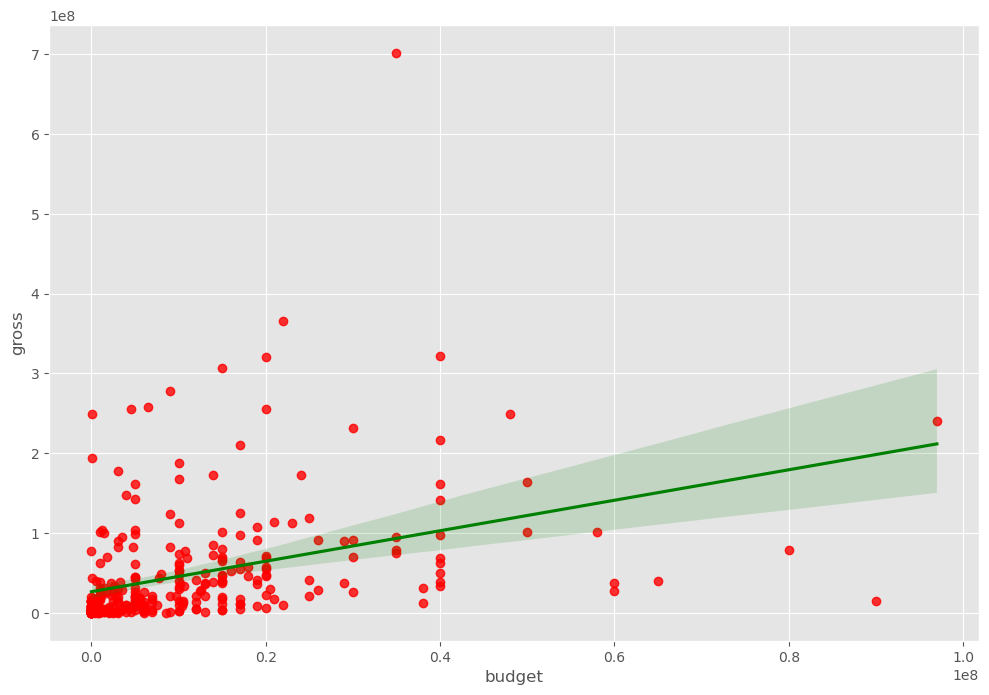

In [47]:
# Plot Budget V/S Gross using seaborn

# sns.regplot(x='budget', y='gross',data=df)
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"green"})

In [49]:
print(df.dtypes)
df


name              object
rating            object
genre             object
year               int64
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget             int64
gross            float64
company           object
runtime          float64
Gross              int64
year_released     object
released_date     object
dtype: object


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
7046,It,R,Horror,2017,7.3,478000.0,Andy Muschietti,Chase Palmer,Bill Skarsgård,United States,35000000,701796444.0,New Line Cinema,135.0,701796444,2017,September 8
7285,The Nun,R,Horror,2018,5.3,127000.0,Corin Hardy,Gary Dauberman,Demián Bichir,United States,22000000,365551694.0,Atomic Monster,96.0,365551694,2018,September 7
6861,The Conjuring 2,R,Horror,2016,7.3,242000.0,James Wan,Chad Hayes,Vera Farmiga,Canada,40000000,321788219.0,New Line Cinema,134.0,321788219,2016,June 10
6245,The Conjuring,R,Horror,2013,7.5,464000.0,James Wan,Chad Hayes,Patrick Wilson,United States,20000000,320290989.0,New Line Cinema,112.0,320290989,2013,July 19
7105,Annabelle: Creation,R,Horror,2017,6.5,120000.0,David F. Sandberg,Gary Dauberman,Anthony LaPaglia,United States,15000000,306515884.0,New Line Cinema,109.0,306515884,2017,August 11
6850,Split,PG-13,Horror,2016,7.3,446000.0,M. Night Shyamalan,M. Night Shyamalan,James McAvoy,United States,9000000,278454417.0,Universal Pictures,117.0,278454417,2017,January 20
6488,Annabelle,R,Horror,2014,5.4,147000.0,John R. Leonetti,Gary Dauberman,Ward Horton,United States,6500000,257579282.0,New Line Cinema,99.0,257579282,2014,October 3
7056,Get Out,R,Horror,2017,7.7,517000.0,Jordan Peele,Jordan Peele,Daniel Kaluuya,United States,4500000,255589157.0,Universal Pictures,104.0,255589157,2017,February 24
7469,Us,R,Horror,2019,6.8,247000.0,Jordan Peele,Jordan Peele,Lupita Nyong'o,United States,20000000,255184580.0,Monkeypaw Productions,116.0,255184580,2019,March 22
4055,The Ring,PG-13,Horror,2002,7.1,328000.0,Gore Verbinski,Ehren Kruger,Naomi Watts,United States,48000000,249348933.0,Dreamworks Pictures,115.0,249348933,2002,October 18


In [51]:
# while ooking at the coorelation encountered with the the error, to solve that error we are finding th eexact location of 'IT'
locations = df.eq("It")  # Check where "It" is located
indices = locations.stack().loc[lambda x: x].index.tolist()  # Get rows and columns where True

print("Locations where 'It' is found:", indices)




Locations where 'It' is found: [(7046, 'name')]


In [53]:
print(df.dtypes)


name              object
rating            object
genre             object
year               int64
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget             int64
gross            float64
company           object
runtime          float64
Gross              int64
year_released     object
released_date     object
dtype: object


In [55]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
correlation_matrix = numeric_df.corr(method='pearson')
correlation_matrix
# types of correlation kendall, pearson, spearman


,year,score,votes,budget,gross,runtime,Gross
year,1.000000,-0.018115,0.305376,0.214199,0.355033,0.130727,0.368229
score,-0.018115,1.000000,0.564808,0.038647,0.250932,0.376803,0.259100
votes,0.305376,0.564808,1.000000,0.308624,0.705634,0.403607,0.711851
budget,0.214199,0.038647,0.308624,1.000000,0.375000,0.392333,0.388063
gross,0.355033,0.250932,0.705634,0.375000,1.000000,0.388382,1.000000
runtime,0.130727,0.376803,0.403607,0.392333,0.388382,1.000000,0.392099
Gross,0.368229,0.259100,0.711851,0.388063,1.000000,0.392099,1.000000


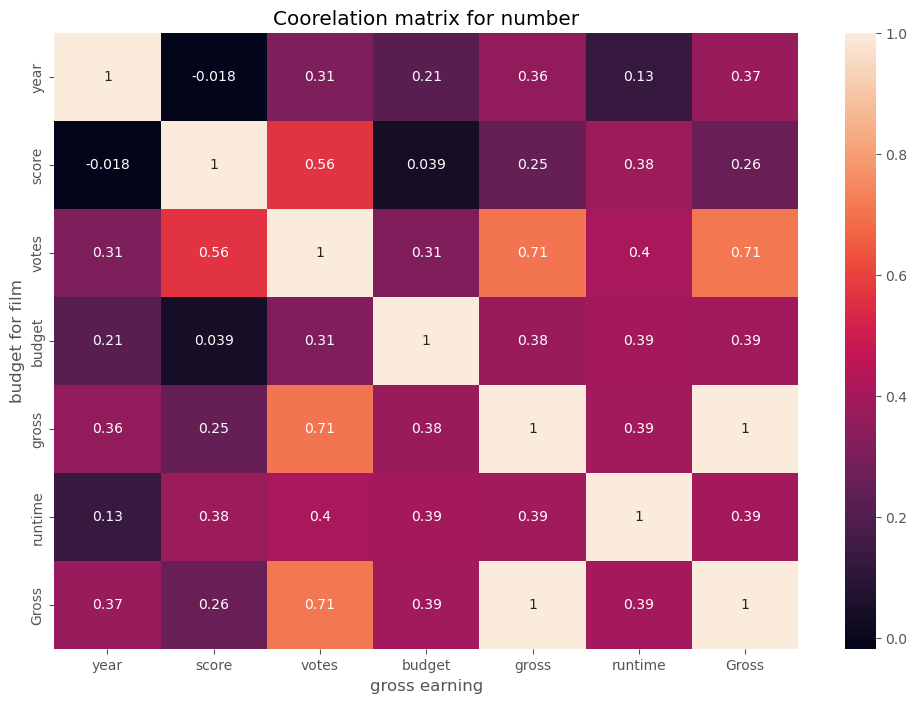

In [57]:
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Coorelation matrix for number')
plt.xlabel('gross earning')
plt.ylabel('budget for film')

plt.show()

In [59]:
df_numerized = df.copy()  

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':  
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
7046,114,4,0,2017,7.3,478000.0,10,35,24,12,35000000,701796444.0,128,135.0,701796444,37,205
7285,255,4,0,2018,5.3,127000.0,38,80,59,12,22000000,365551694.0,23,96.0,365551694,38,204
6861,217,4,0,2016,7.3,242000.0,104,31,276,2,40000000,321788219.0,128,134.0,321788219,36,96
6245,216,4,0,2013,7.5,464000.0,104,31,221,12,20000000,320290989.0,128,112.0,320290989,33,88
7105,15,4,0,2017,6.5,120000.0,50,80,15,12,15000000,306515884.0,128,109.0,306515884,37,21
6850,191,3,0,2016,7.3,446000.0,159,134,104,12,9000000,278454417.0,184,117.0,278454417,37,73
6488,13,4,0,2014,5.4,147000.0,133,80,280,12,6500000,257579282.0,128,99.0,257579282,34,179
7056,76,4,0,2017,7.7,517000.0,137,117,49,12,4500000,255589157.0,184,104.0,255589157,37,57
7469,292,4,0,2019,6.8,247000.0,137,117,190,12,20000000,255184580.0,123,116.0,255184580,39,119
4055,268,3,0,2002,7.1,328000.0,88,71,207,12,48000000,249348933.0,66,115.0,249348933,22,168


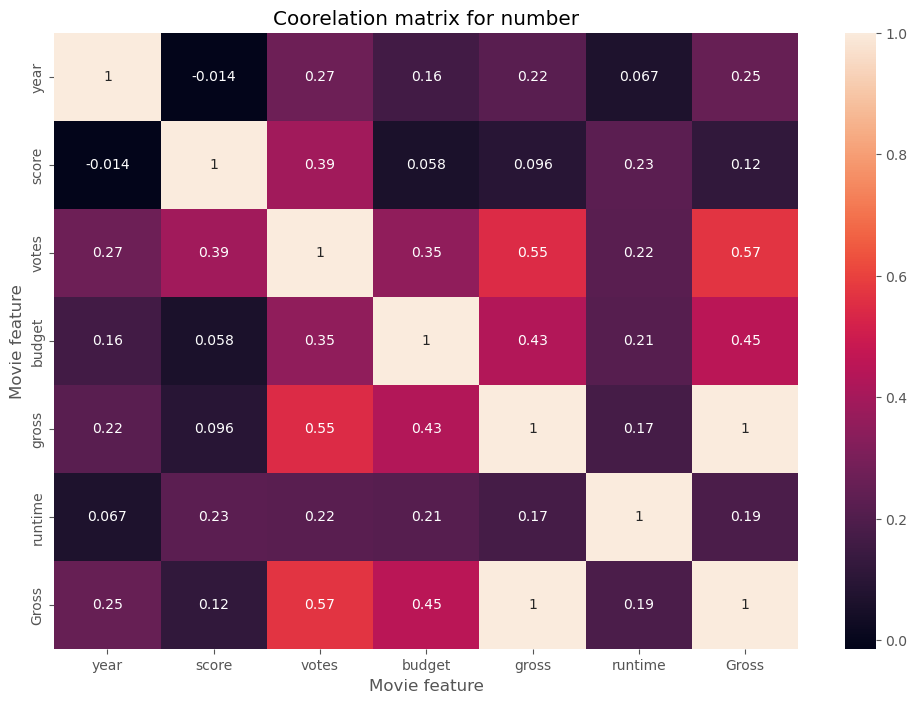

In [65]:
correlation_matrix = numeric_df.corr(method='kendall')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Coorelation matrix for number')
plt.xlabel('Movie feature')
plt.ylabel('Movie feature')

plt.show()

In [67]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Gross,year_released,released_date
name,1.000000,-0.017984,NaN,0.117285,-0.004189,0.004287,0.071368,-0.033390,-0.045964,-0.076404,0.004328,-0.009271,-0.012205,0.089999,-0.006241,0.117923,-0.076818
rating,-0.017984,1.000000,NaN,-0.162106,0.119056,0.067964,-0.134149,-0.027926,0.018142,0.049084,0.066146,0.063453,0.080444,0.046469,0.063916,-0.164217,-0.004425
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.117285,-0.162106,NaN,1.000000,-0.018115,0.305376,0.018642,0.034077,0.024048,-0.005701,0.214199,0.355033,0.046417,0.130727,0.368229,0.999243,-0.071613
score,-0.004189,0.119056,NaN,-0.018115,1.000000,0.564808,-0.117875,-0.046383,-0.012547,-0.104709,0.038647,0.250932,-0.013138,0.376803,0.259100,-0.012159,-0.036826
votes,0.004287,0.067964,NaN,0.305376,0.564808,1.000000,-0.054822,-0.090743,0.003582,0.062701,0.308624,0.705634,0.118342,0.403607,0.711851,0.304317,-0.017985
director,0.071368,-0.134149,NaN,0.018642,-0.117875,-0.054822,1.000000,0.347883,-0.001838,0.070158,-0.005547,-0.064475,0.081425,-0.011009,-0.064214,0.017583,-0.053175
writer,-0.033390,-0.027926,NaN,0.034077,-0.046383,-0.090743,0.347883,1.000000,0.025664,-0.003855,0.015838,-0.121891,0.015878,-0.016182,-0.111754,0.031606,-0.084738
star,-0.045964,0.018142,NaN,0.024048,-0.012547,0.003582,-0.001838,0.025664,1.000000,0.030681,0.067597,0.019646,0.043130,0.139816,0.020333,0.020340,0.026348
country,-0.076404,0.049084,NaN,-0.005701,-0.104709,0.062701,0.070158,-0.003855,0.030681,1.000000,0.042303,0.082447,-0.008377,-0.064957,0.072761,-0.011502,-0.012570


In [69]:
correlation_mat=df_numerized.corr()

corr_pairs=correlation_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.017984
               genre                 NaN
               year             0.117285
               score           -0.004189
               votes            0.004287
               director         0.071368
               writer          -0.033390
               star            -0.045964
               country         -0.076404
               budget           0.004328
               gross           -0.009271
               company         -0.012205
               runtime          0.089999
               Gross           -0.006241
               year_released    0.117923
               released_date   -0.076818
rating         name            -0.017984
               rating           1.000000
               genre                 NaN
               year            -0.162106
               score            0.119056
               votes            0.067964
               director        -0.134149
               w

In [71]:
sorted_pairs=corr_pairs.sort_values()

sorted_pairs

rating         year_released   -0.164217
year_released  rating          -0.164217
year           rating          -0.162106
rating         year            -0.162106
director       rating          -0.134149
rating         director        -0.134149
gross          writer          -0.121891
writer         gross           -0.121891
score          director        -0.117875
director       score           -0.117875
Gross          writer          -0.111754
writer         Gross           -0.111754
score          country         -0.104709
country        score           -0.104709
writer         votes           -0.090743
votes          writer          -0.090743
writer         released_date   -0.084738
released_date  writer          -0.084738
               name            -0.076818
name           released_date   -0.076818
country        name            -0.076404
name           country         -0.076404
year_released  released_date   -0.075272
released_date  year_released   -0.075272
budget         r

In [73]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]

high_corr

votes          score            0.564808
score          votes            0.564808
votes          gross            0.705634
gross          votes            0.705634
Gross          votes            0.711851
votes          Gross            0.711851
year_released  year             0.999243
year           year_released    0.999243
name           name             1.000000
Gross          Gross            1.000000
rating         rating           1.000000
year           year             1.000000
score          score            1.000000
votes          votes            1.000000
director       director         1.000000
writer         writer           1.000000
year_released  year_released    1.000000
star           star             1.000000
budget         budget           1.000000
gross          gross            1.000000
               Gross            1.000000
company        company          1.000000
runtime        runtime          1.000000
Gross          gross            1.000000
country        c

In [ ]:
# votes and Budget have the highest coorelation to gross earnings
# company has low correlation
